In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

## Function 1: Functions for converting images to grayscale image

#### Converting an image into grayscale image

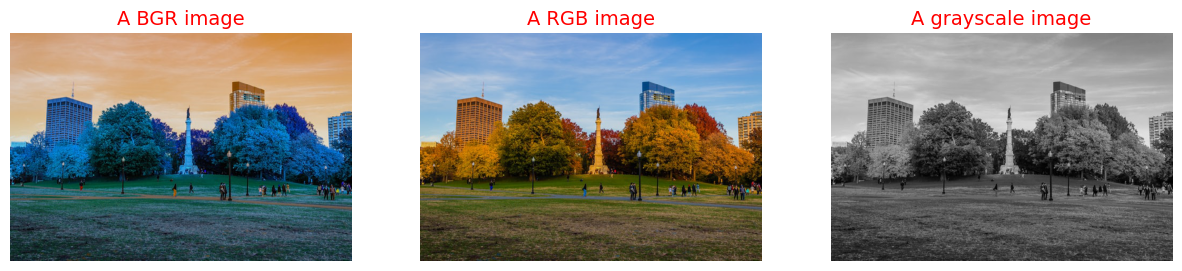

In [2]:
img = cv.imread('Photos/park.jpg')

# Converting a BGR image to RGB image
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

# Converting a BGR image to grayscale image
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('A BGR image',fontsize=14,color='red')

ax[1].imshow(img_rgb)
ax[1].axis('off')
ax[1].set_title('A RGB image',fontsize=14,color='red')

ax[2].imshow(img_gray,cmap='gray')
ax[2].axis('off')
ax[2].set_title('A grayscale image',fontsize=14,color='red')

plt.show()

### Creating a blurred image

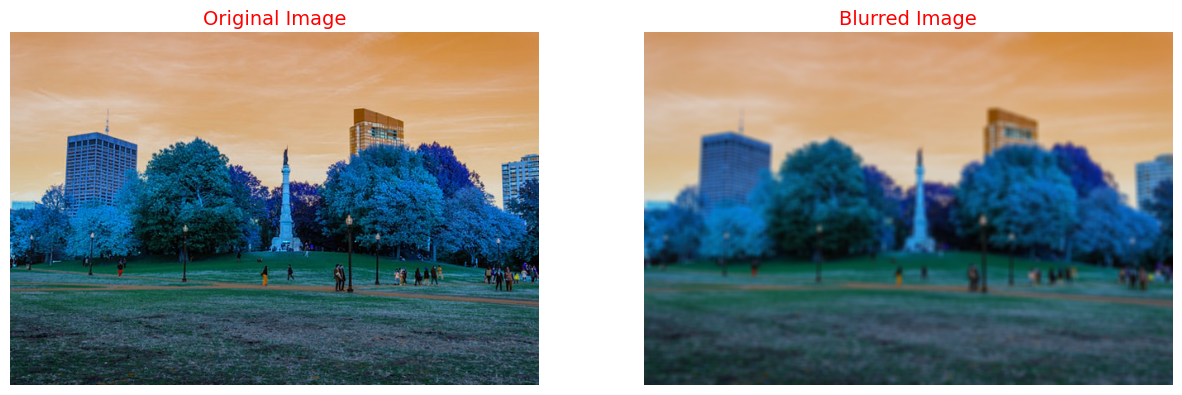

In [3]:
# Let's create a blurred image using gaussian blur
# (3,3) is the kernel size
img_blur = cv.GaussianBlur(img,(7,7),cv.BORDER_DEFAULT)

fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].imshow(img)
ax[0].set_title('Original Image',fontsize=14,color='red')
ax[0].axis('off')

ax[1].imshow(img_blur)
ax[1].set_title('Blurred Image',fontsize=14,color='red')
ax[1].axis('off')

plt.show()

## Function 2: Functions for detecting edge

Canny edges is a popular edge detection algorithm in opencv

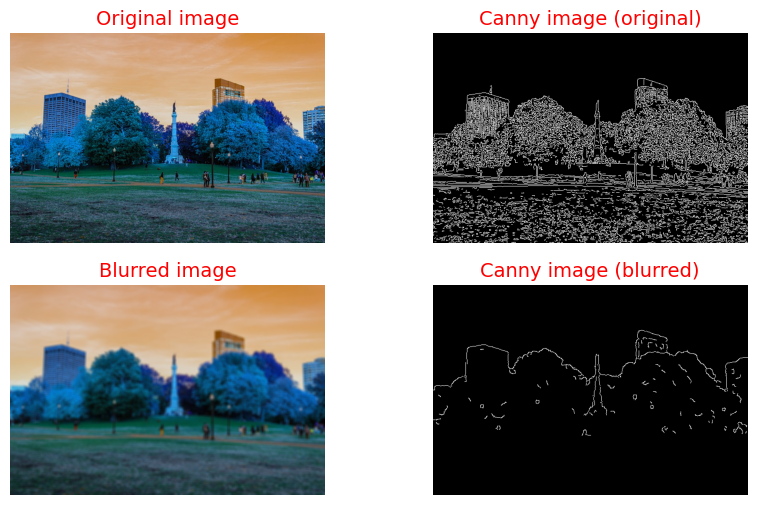

In [4]:
img_canny_original = cv.Canny(img,125,175)
# 125,175 - two randomly taken threshold values

img_canny_blurred = cv.Canny(img_blur,125,175)

fig,ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(img)
ax[0,0].set_title('Original image',fontsize=14,color='red')
ax[0,0].axis('off')

ax[0,1].imshow(img_canny_original,cmap='gray')
ax[0,1].set_title('Canny image (original)',fontsize=14,color='red')
ax[0,1].axis('off')

ax[1,0].imshow(img_blur)
ax[1,0].set_title('Blurred image',fontsize=14,color='red')
ax[1,0].axis('off')

ax[1,1].imshow(img_canny_blurred,cmap='gray')
ax[1,1].set_title('Canny image (blurred)',fontsize=14,color='red')
ax[1,1].axis('off')

plt.show()

This signifies that blurring reduces the edges present in the image

## Function 3: Functions for dialating the image

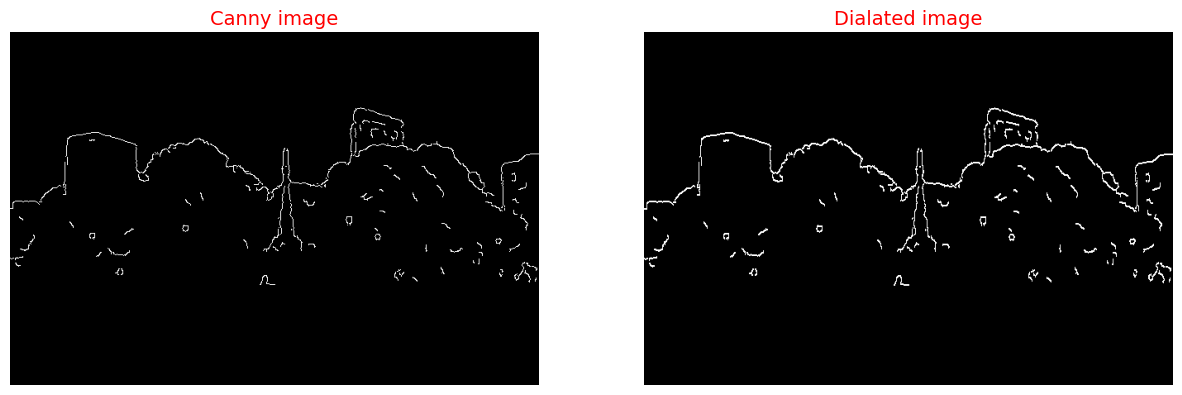

In [5]:
img_dialate = cv.dilate(img_canny_blurred,(3,3),iterations=1)

fig,ax = plt.subplots(1,2,figsize=(15,6))

# Canny image
ax[0].imshow(img_canny_blurred,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Canny image',fontsize=14,color='red')

# Dialated canny image
ax[1].imshow(img_dialate,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Dialated image',fontsize=14,color='red')

plt.show()

There will be subtle differences between these two images. The dialation can be more easily recognized if we use larger kernel size (which is currently (3,3)) or using more number of iterations (which is currently 1)

## Function 4: Functions for eroding the image

Once we dialate the image for better recognition of the edges, we can use eroding to get back the original image. As per my present knowledge, we might get close to the image, but may not get quite close to it also.

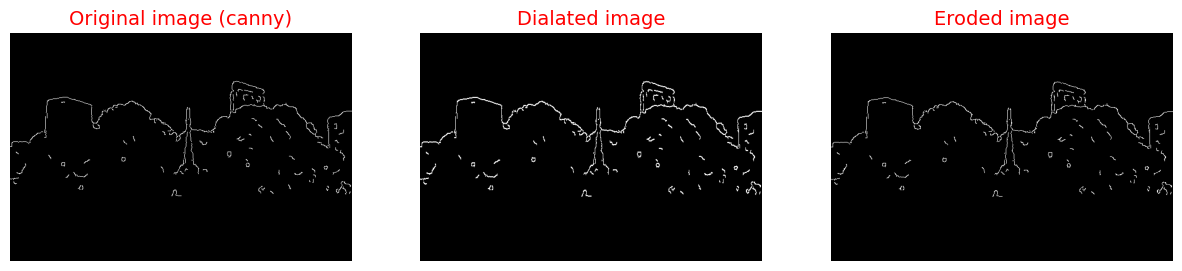

In [6]:
img_erode = cv.erode(img_dialate,(3,3),iterations=1)

fig,ax = plt.subplots(1,3,figsize=(15,10))

# Canny image - original
ax[0].imshow(img_canny_blurred,cmap='gray')
ax[0].set_title('Original image (canny)',fontsize=14,color='red')
ax[0].axis('off')

# Dialated image
ax[1].imshow(img_dialate,cmap='gray')
ax[1].set_title('Dialated image',fontsize=14,color='red')
ax[1].axis('off')

# Eroded image
ax[2].imshow(img_erode,cmap='gray')
ax[2].set_title('Eroded image',fontsize=14,color='red')
ax[2].axis('off')

plt.show()

## Function 5: Function for resizing an image

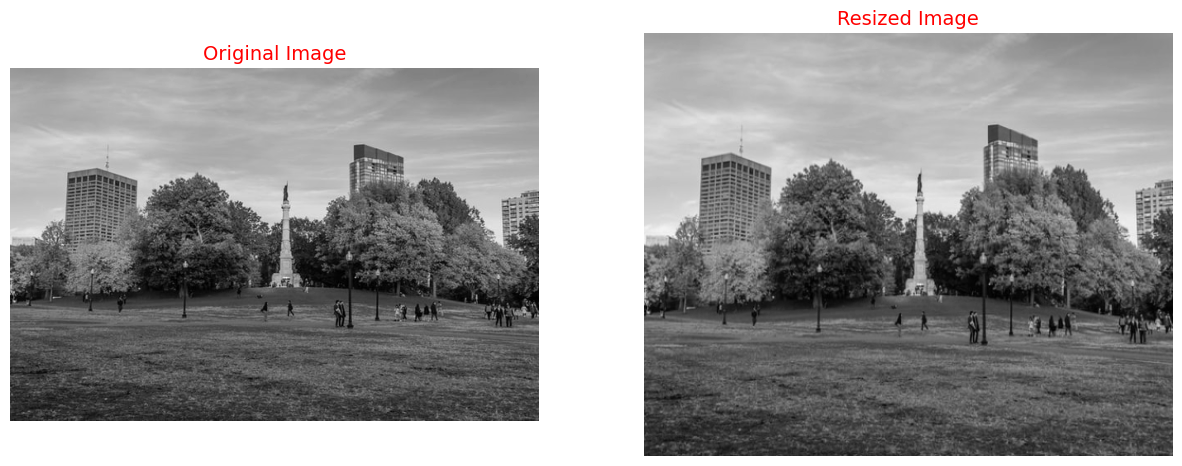

Original size of the image =  (427, 640)
New size of the image =  (400, 500)


In [7]:
original_size = img_gray.shape
new_size = (500,400)

# Resized image
img_resize = cv.cvtColor(cv.resize(img,new_size,interpolation=cv.INTER_AREA),cv.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].imshow(img_gray,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image',fontsize=14,color='red')

ax[1].imshow(img_resize,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Resized Image',fontsize=14,color='red')

plt.show()

print('Original size of the image = ',original_size)
print('New size of the image = ',img_resize.shape)

While resizing an image, special attention has to be given to the type of interpolation scheme that is being used. Here for the resizing purpose, we have used **cv.INTER_AREA**. Howver, depending upon different situations, we may need other schemes.

## Cropping an image

Size of the image =  (427, 640)
Size of the cropped image =  (150, 390)


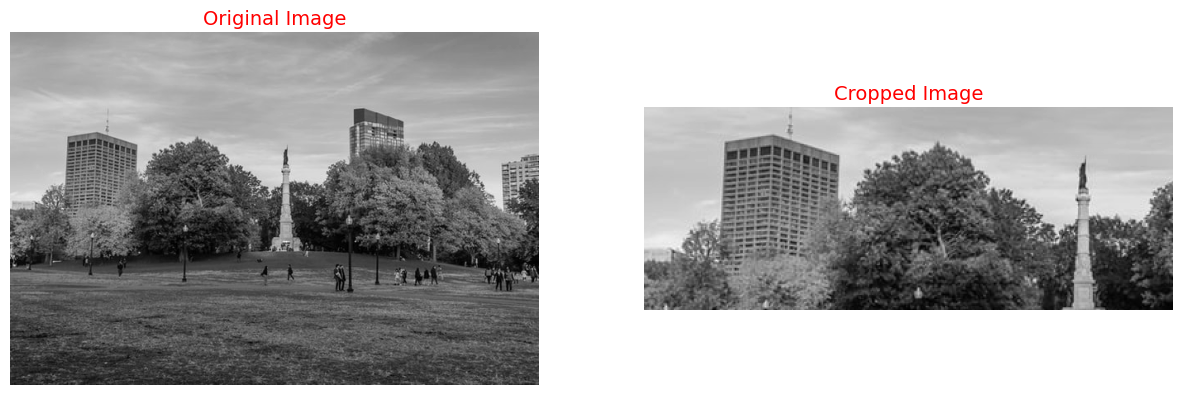

In [20]:
print('Size of the image = ',img_gray.shape)
img_crop = img_gray[100:250,10:400]
print('Size of the cropped image = ',img_crop.shape)
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].imshow(cv.cvtColor(cv.imread('Photos/park.jpg'),cv.COLOR_BGR2GRAY),cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image',fontsize=14,color='red')

ax[1].imshow(img_crop,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Cropped Image',fontsize=14,color='red')

plt.show()